<img src = "loans_image.jpg" style="width:500px; height :200px"/>

## <a id="32">1. Introduction and Objective of the Case Study</a>

This case study aims to identify patterns which indicate if a client is able to repay his installments on his loan or facing payment difficulties. This will help the company to take actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:
   1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

   2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The main objective of the case study is to identify driving factors using EDA, to evade either of the above mentioned business risks

## <a id="32">2. Import important libraries and other preliminary settings</a>

In [115]:
import jovian 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
plt.style.use('ggplot')
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')
import scipy as sp
import datetime
import time
from datetime import datetime, date, time, timedelta

In [116]:
#Setting the options to display max rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

#Setting the options to convert scientific notations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format 

## <a id="32">3. Read the data and create dataframes</a>

In [117]:
#reading the columns_description.csv
col_desc = pd.read_csv("columns_description.csv",encoding = "ISO-8859-1",nrows=500)
print ("Data read into a pandas 'col_desc' dataframe!")

Data read into a pandas 'col_desc' dataframe!


In [118]:
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [119]:
#reading the application_data.csv and previous_application.csv
app_data = pd.read_csv("application_data.csv")
prev_data = pd.read_csv("previous_application.csv")
print ("Data read into both pandas dataframes!")

Data read into both pandas dataframes!


In [120]:
print("Application Dataset       :",app_data.shape)
print("Previous Application Data :",prev_data.shape)

Application Dataset       : (307511, 122)
Previous Application Data : (1670214, 37)


## <a id="32">4. Missing / Redundant Data Treatment</a>

<h4><font color = purple >4.1 Identify the columns with more than 30% missing or Null values in both the datasets </font></h4>

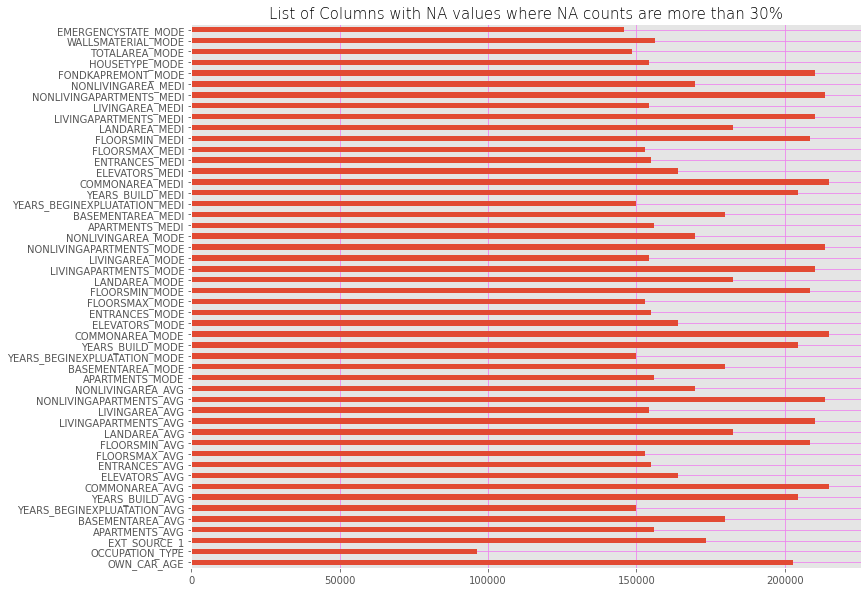

In [121]:
null_col = app_data.isnull().sum()
null_col = null_col[null_col.values >(0.3*len(app_data))]
plt.figure(figsize=(12,10))
null_col.plot(kind='barh')
plt.title('List of Columns with NA values where NA counts are more than 30%',fontdict={'color':'Black','fontsize':15,'fontweight':5})
plt.grid(True,color='Violet')
plt.show()

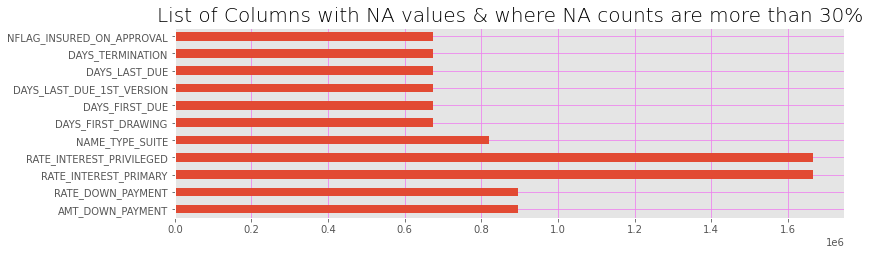

In [122]:
null_coll = prev_data.isnull().sum()
null_coll = null_coll[null_coll.values >(0.3*len(prev_data))]
plt.figure(figsize=(12,3.5))
null_coll.plot(kind='barh')
plt.title('List of Columns with NA values & where NA counts are more than 30%',fontdict={'color':'Black','fontsize':20,'fontweight':5})
plt.grid(True,color='Violet')
plt.show()

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>There seems to be many columns having more than 30% of missing or Null values in the datasets in scope. We checked the desciption of those column names in the Data Dictionary dataset and accordingly going ahead and dropping them.</i>
</div>   

In [123]:
#defining a function to drop rows/columns with null values on any dataset
def removeNull(dataframe, axis =1, percent=0.3):
    '''
    * removeNull function will remove the rows and columns based on parameters provided.
    * dataframe : Name of the dataframe  
    * axis      : axis = 0 defines drop rows, axis =1(default) defines drop columns    
    * percent   : percent of data where column/rows values are null,default is 0.3(30%)
              
    '''
    df = dataframe.copy()
    ishape = df.shape
    if axis == 0:
        rownames = df.transpose().isnull().sum()
        rownames = list(rownames[rownames.values > percent*len(df)].index)
        df.drop(df.index[rownames],inplace=True) 
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames = (df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percent].index)
        df.drop(labels = colnames,axis =1,inplace=True)        
        print("Number of Columns dropped\t: ",len(colnames))
        
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)

    return df

In [124]:
#Removing the columns with missing / Null values above 30% from the Application dataset
app_data= removeNull(app_data,axis =1, percent = 0.3)

Number of Columns dropped	:  50

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 72)


In [125]:
#Removing the columns with missing / Null values above 30% from the Previous Application dataset
prev_data= removeNull(prev_data,axis =1, percent = 0.3)

Number of Columns dropped	:  11

Old dataset rows,columns (1670214, 37) 
New dataset rows,columns (1670214, 26)


<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>After dropping the columns with insufficient data, we are left with 72 columns in the Application dataset (app_data) and 26 columns in the Previous Application dataset (prev_data).</i>
</div>  

<h4><font color = purple >4.2 Identify the columns which may not have any correlation with the Target and are redundant </font></h4>


In [126]:
#defining a function to find the correlation of set of columns with the Target
def corrTarget(dataframe,column_list):
    corr=dataframe[column_list].corr()
    if len(column_list)>8:
        plt.figure(figsize=(20,13))
    else:
        plt.figure(figsize=(10,8))
    sns.heatmap(corr,
               xticklabels = corr.columns,
               yticklabels = corr.columns,
               annot=True,
               cmap="RdYlGn",
               linewidth=1)
    plt.title(("Finding Correlation"),fontdict={'fontsize':15,'fontweight':5, 'color': 'Black'})
    plt.show()

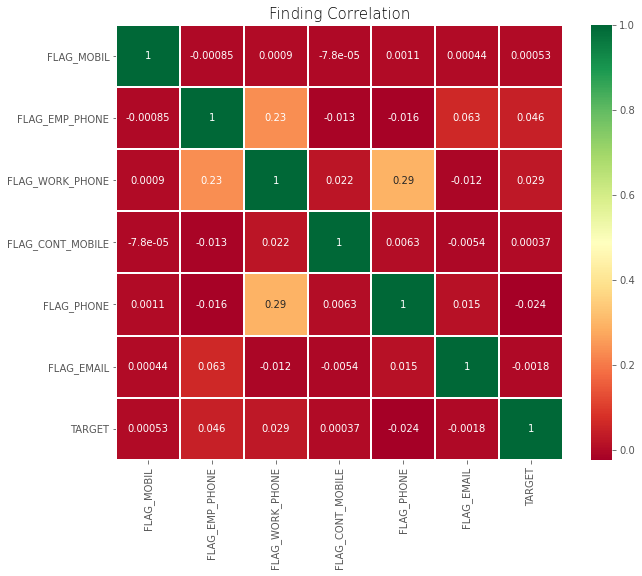

In [127]:
#The flag columns related to Phone number seem to be not so important from the description. 
#Still checking their correlation with the Target

corrTarget(app_data,['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET'])



<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>There seems to be no significant correlation between the Flag Mobile, Phone, Email, etc with the loan payment Target, so we can go ahead and drop these columns.</i>
</div>  

In [128]:
app_data.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL'], axis=1, inplace=True)

In [129]:
app_data.shape

(307511, 66)

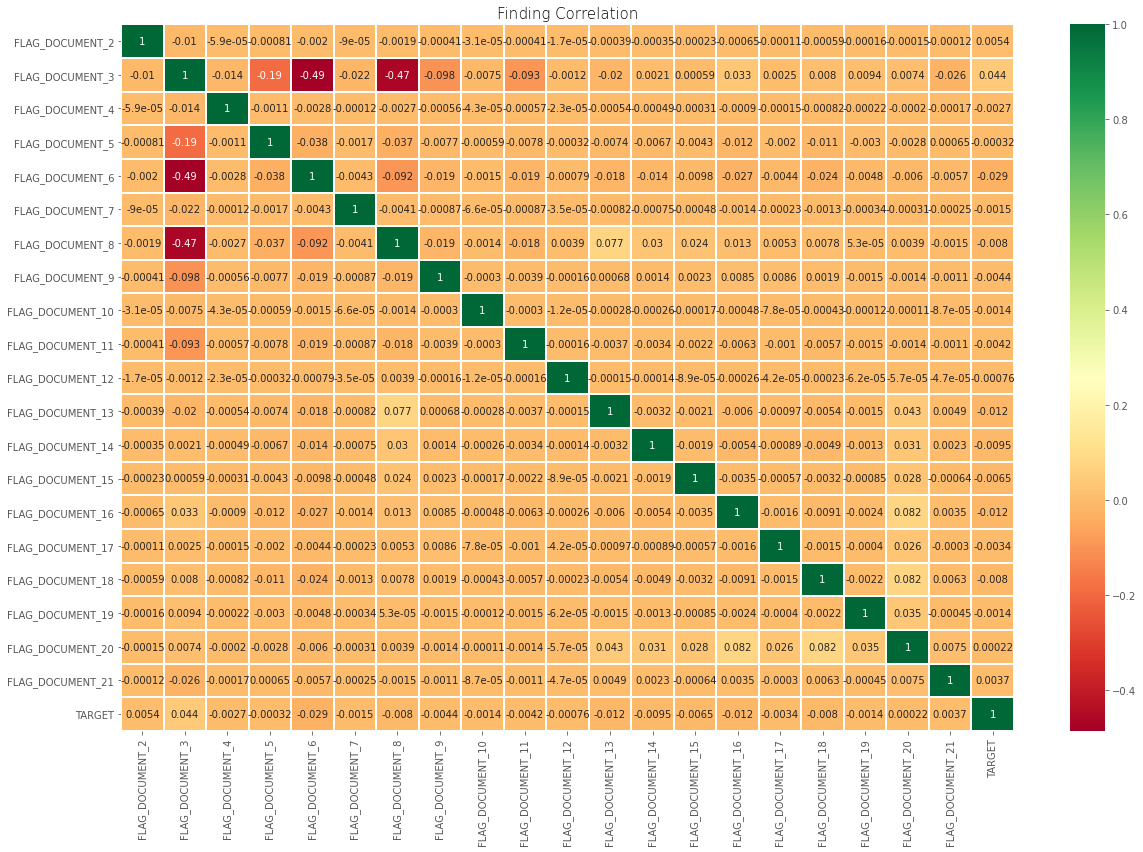

In [130]:
#Similarly ,the flag columns related to Document also seem to be not so important from the description, hence checking their correlation with the Target

corrTarget(app_data,[ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TARGET'])

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>There seems to be no significant correlation between the Flag Document columns with the loan payment Target as well, so we are going ahead and dropping these columns.</i>
</div>  


In [131]:
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
app_data.drop(col_Doc, axis=1, inplace=True)

In [132]:
app_data.shape

(307511, 46)

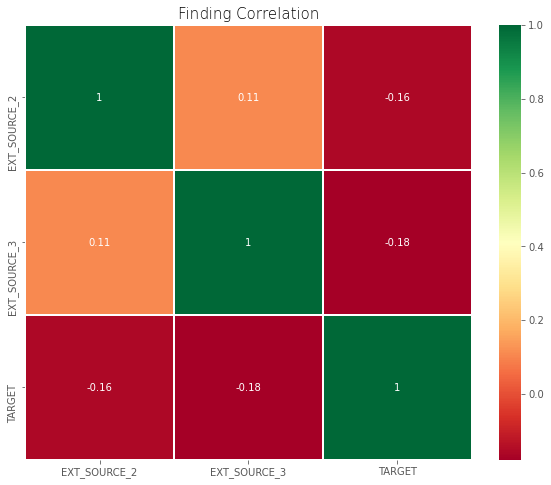

In [133]:
#In the same approach,the flag columns related to External Data Source seem to be not so important from the description. 
#Let us check their correlation with the Target

corrTarget(app_data,["EXT_SOURCE_2","EXT_SOURCE_3","TARGET"])

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>As expected,the External Data Source columns also donot have any significant correlation with the loan payment Target, and can be dropped.</i>
</div>  

In [134]:
app_data.drop(["EXT_SOURCE_2","EXT_SOURCE_3"], axis=1, inplace=True)

In [135]:
app_data.shape

(307511, 44)

In [136]:
prev_data.shape

(1670214, 26)

<h4><font color = purple >4.3 Data Imputation : Identifying more columns with missing data and treating them </font></h4>

In [137]:
#checking the missing values in the remaining columns, after dropping most of the columns with highly insufficient data or very meagre correlation
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
R

In [138]:
#checking datatypes of each column
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Let us inspect each of these numeric columns for missing data using box plot and impute proper data in them.</i>
</div>  


In [139]:
#defining a function to plot a boxplot for the column name passed, which will help us to identify outliers in case of numeric variables
def boxplot(dataframe,column):
    plt.figure(figsize=[15,3])
    sns.boxplot(dataframe[column])
    plt.xlabel(([column]),fontdict ={'fontsize':15, 'color':'Black'})
    plt.show()

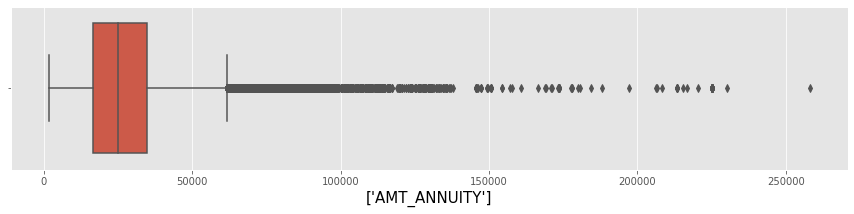

In [140]:
# AMT_ANNUITY has 12 rows with Null Values. We are plotting a boxplot to identify the outliers
boxplot(app_data,'AMT_ANNUITY')

In [141]:
# From the above figure we know that there are many outliers in this numerical variable, hence we fill the null values with median value;
app_data.AMT_ANNUITY.median()

24903.0

In [142]:
app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(), inplace=True)
app_data.AMT_ANNUITY.isnull().sum()

0

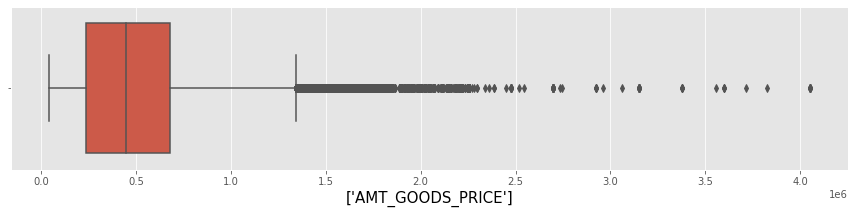

In [143]:
# AMT_GOODS_PRICE has 278 rows with Null Values. We are plotting a boxplot to identify the outliers
boxplot(app_data,'AMT_GOODS_PRICE')

In [144]:
#replacing the missing data with median value, since this one also has many outliers
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(), inplace=True)
app_data.AMT_GOODS_PRICE.isnull().sum()

0

In [145]:
#inspecting missing values in CNT_FAM_MEMBERS
app_data['CNT_FAM_MEMBERS'].describe()

count   307509.0000
mean         2.1527
std          0.9107
min          1.0000
25%          2.0000
50%          2.0000
75%          3.0000
max         20.0000
Name: CNT_FAM_MEMBERS, dtype: float64

In [146]:
# CNT_FAM_MEMBERS has 2 null values in them, so we can replace them with the mode value.
app_data['CNT_FAM_MEMBERS'].mode()

0   2.0000
dtype: float64

In [147]:
app_data.CNT_FAM_MEMBERS.fillna(2.0000,inplace=True)

In [148]:
app_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [149]:
# Now lets try descriptive analysis on AMT_REQ_CREDIT_BUREAU related columns:
amt= app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
amt.describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000,265992.0000
mean,0.0064,0.0070,0.0344,0.2674,0.2655,1.9000
std,0.0838,0.1108,0.2047,0.9160,0.7941,1.8693
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
75%,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000
max,4.0000,9.0000,8.0000,27.0000,261.0000,25.0000


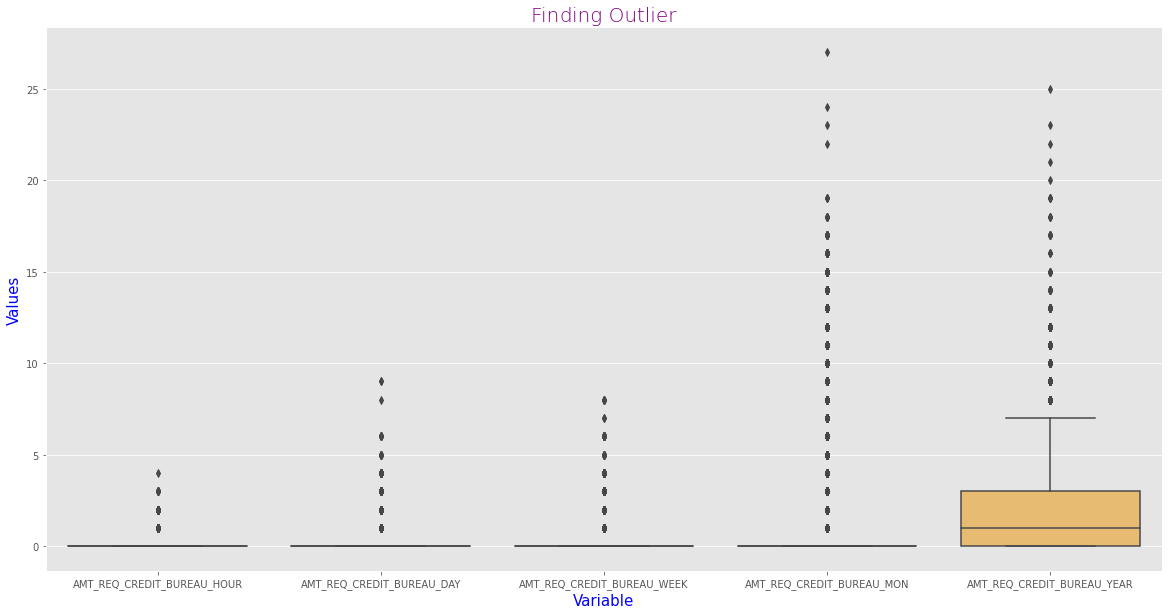

In [150]:
# Plotting Boxplot:
plt.figure(figsize=[20,10])

bdf = pd.DataFrame(data = app_data, columns = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_YEAR'])

sns.boxplot(x="variable", y="value", data=pd.melt(bdf))
plt.title("Finding Outlier", fontdict={'color':'Purple','fontsize':20,'fontweight':5})
plt.xlabel("Variable",fontdict ={'fontsize':15, 'color':'Blue'})
plt.ylabel("Values",fontdict ={'fontsize':15,'color':'Blue'})
plt.show()

In [151]:
#From the above plot its clear the columns are having many outliers, so we go ahead with computing median values:

for col in amt:
    app_data[col].fillna(app_data[col].median(),inplace = True)

<div class="alert alert-block alert-info">
    <b>Next Step:</b>
   <br>
   <i>Let us inspect each of the categorical columns for missing data and impute proper data in them</i>
</div>  

In [152]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
CNT_FAM_MEMBERS                   0
REGION_RATING_CLIENT              0
REGION_RATING_CLIENT_W_CITY       0
WEEKDAY_APPR_PROCESS_START        0
HOUR_APPR_PROCESS_START           0
REG_REGION_NOT_LIVE_REGION        0
REG_REGION_NOT_WORK_REGION  

In [153]:
#inspecting NAME_TYPE_SUITE column for missing data imputation
app_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied     0.8116
Family            0.1311
Spouse, partner   0.0371
Children          0.0107
Other_B           0.0058
Other_A           0.0028
Group of people   0.0009
Name: NAME_TYPE_SUITE, dtype: float64

In [154]:
#Since the major proportion of the data has the value 'Unaccompanied' in this column, we can replace the missing records with this mode value
app_data.NAME_TYPE_SUITE.fillna('Unaccompanied',inplace=True)

In [155]:
app_data.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [156]:
#CODE_GENDER column has value as XNA for 4 rows, which looks like a wrong entry. As the count of XNA is only 4 rows , we can go ahead and drop those records.
app_data.drop(app_data[app_data['CODE_GENDER'] == 'XNA'].index,inplace=True)

In [157]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [158]:
# ORGANIZATION_TYPE column has 55374 rows with the XNA value, which looks like a wrong entry. 
# But the count is too high to be dropped or replaced by mode value, so we are repalcing it with Unknown.

app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].replace('XNA','Unknown')

## <a id="32">5. Data Cleaning : Updating datatypes and standardizing data, wherever applicable</a>

In [159]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307507 non-null  int64  
 1   TARGET                       307507 non-null  int64  
 2   NAME_CONTRACT_TYPE           307507 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307507 non-null  object 
 5   FLAG_OWN_REALTY              307507 non-null  object 
 6   CNT_CHILDREN                 307507 non-null  int64  
 7   AMT_INCOME_TOTAL             307507 non-null  float64
 8   AMT_CREDIT                   307507 non-null  float64
 9   AMT_ANNUITY                  307507 non-null  float64
 10  AMT_GOODS_PRICE              307507 non-null  float64
 11  NAME_TYPE_SUITE              307507 non-null  object 
 12  NAME_INCOME_TYPE             307507 non-null  object 
 13 

In [160]:
#As the count of family members can't be a decimal value , so converted that column into Integer.
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype("int")

In [161]:
#There are few data columns related to datetime, having negative values. We can convert them to positive.
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for i in date_col:
    app_data[i] = abs(app_data[i])

In [162]:
# Lets convert Income values in Lacs:
app_data['AMT_INCOME_TOTAL']=app_data['AMT_INCOME_TOTAL']/100000

In [163]:
# Lets convert Credit amount values in Lacs:
app_data['AMT_CREDIT']=app_data['AMT_CREDIT']/100000

In [164]:
#checking percentage of null/missing values once more
app_data.isnull().sum() * 100 / len(app_data)

SK_ID_CURR                    0.0000
TARGET                        0.0000
NAME_CONTRACT_TYPE            0.0000
CODE_GENDER                   0.0000
FLAG_OWN_CAR                  0.0000
FLAG_OWN_REALTY               0.0000
CNT_CHILDREN                  0.0000
AMT_INCOME_TOTAL              0.0000
AMT_CREDIT                    0.0000
AMT_ANNUITY                   0.0000
AMT_GOODS_PRICE               0.0000
NAME_TYPE_SUITE               0.0000
NAME_INCOME_TYPE              0.0000
NAME_EDUCATION_TYPE           0.0000
NAME_FAMILY_STATUS            0.0000
NAME_HOUSING_TYPE             0.0000
REGION_POPULATION_RELATIVE    0.0000
DAYS_BIRTH                    0.0000
DAYS_EMPLOYED                 0.0000
DAYS_REGISTRATION             0.0000
DAYS_ID_PUBLISH               0.0000
CNT_FAM_MEMBERS               0.0000
REGION_RATING_CLIENT          0.0000
REGION_RATING_CLIENT_W_CITY   0.0000
WEEKDAY_APPR_PROCESS_START    0.0000
HOUR_APPR_PROCESS_START       0.0000
REG_REGION_NOT_LIVE_REGION    0.0000
R

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Almost all the data in the Application Dataset is clean.
<br>Columns related to CNT_SOCIAL_CIRCLE have very minimal null values , for time being we can ignore them, since we donot know the purpose of these columns</i>
</div>  

In [165]:
#Checking the number of unique values each column possess to identify categorical columns
app_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
REG_REGION_NOT_WORK_REGION          2
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_DAY           9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
CNT_FAM_MEMB

In [166]:
# Converting data type to Numeric:
numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

app_data[numeric_columns]=app_data[numeric_columns].apply(pd.to_numeric)

app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.0250,4.0660,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,9461,637,3648.0000,2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0000,2.0000,2.0000,2.0000,-1134.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
1,100003,0,Cash loans,F,N,N,0,2.7000,12.9350,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,16765,1188,1186.0000,291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,100004,0,Revolving loans,M,Y,Y,0,0.6750,1.3500,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,19046,225,4260.0000,2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0000,0.0000,0.0000,0.0000,-815.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,100006,0,Cash loans,F,N,Y,0,1.3500,3.1268,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,19005,3039,9833.0000,2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0000,0.0000,2.0000,0.0000,-617.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
4,100007,0,Cash loans,M,N,Y,0,1.2150,5.1300,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,19932,3038,4311.0000,3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0000,0.0000,0.0000,0.0000,-1106.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [167]:
#Conversion of Object columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    app_data[col] =pd.Categorical(app_data[col])

In [168]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307507 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307507 non-null  int64   
 1   TARGET                       307507 non-null  int64   
 2   NAME_CONTRACT_TYPE           307507 non-null  category
 3   CODE_GENDER                  307507 non-null  category
 4   FLAG_OWN_CAR                 307507 non-null  category
 5   FLAG_OWN_REALTY              307507 non-null  category
 6   CNT_CHILDREN                 307507 non-null  int64   
 7   AMT_INCOME_TOTAL             307507 non-null  float64 
 8   AMT_CREDIT                   307507 non-null  float64 
 9   AMT_ANNUITY                  307507 non-null  float64 
 10  AMT_GOODS_PRICE              307507 non-null  float64 
 11  NAME_TYPE_SUITE              307507 non-null  category
 12  NAME_INCOME_TYPE             307507 non-null

## <a id="32">5. Treating missing data and cleaning in Previous Application Dataset</a>

In [169]:
prev_data.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>There are only 3 columns majorly with Null values in the previous Application Dataset, so let's go ahead and impute them accordingly</i>
</div>  

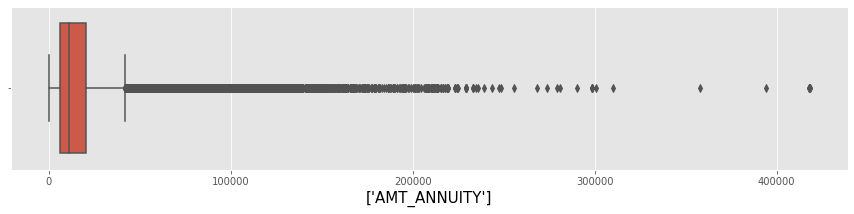

In [170]:
#inspecting missing values in AMT_ANNUITY                    
boxplot(prev_data,'AMT_ANNUITY')

In [171]:
# From the above plot we can see there are many outliers , so can go ahead with imputing median values
prev_data.AMT_ANNUITY.fillna(prev_data.AMT_ANNUITY.median(), inplace=True)

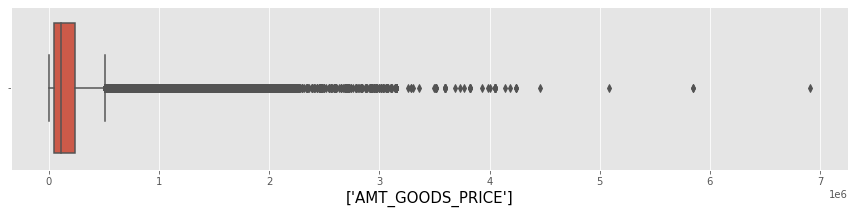

In [172]:
#inspecting missing values in AMT_GOODS_PRICE                    
boxplot(prev_data,'AMT_GOODS_PRICE')

In [173]:
# In a similar approach, imputing the null values for AMT_GOODS_PRICE with median values
prev_data.AMT_GOODS_PRICE.fillna(prev_data.AMT_GOODS_PRICE.median(), inplace=True)

In [174]:
#checking the percentage of null values in Previous Application dataset
prev_data.isnull().sum() * 100 / len(prev_data)

SK_ID_PREV                     0.0000
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
AMT_ANNUITY                    0.0000
AMT_APPLICATION                0.0000
AMT_CREDIT                     0.0001
AMT_GOODS_PRICE                0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
FLAG_LAST_APPL_PER_CONTRACT    0.0000
NFLAG_LAST_APPL_IN_DAY         0.0000
NAME_CASH_LOAN_PURPOSE         0.0000
NAME_CONTRACT_STATUS           0.0000
DAYS_DECISION                  0.0000
NAME_PAYMENT_TYPE              0.0000
CODE_REJECT_REASON             0.0000
NAME_CLIENT_TYPE               0.0000
NAME_GOODS_CATEGORY            0.0000
NAME_PORTFOLIO                 0.0000
NAME_PRODUCT_TYPE              0.0000
CHANNEL_TYPE                   0.0000
SELLERPLACE_AREA               0.0000
NAME_SELLER_INDUSTRY           0.0000
CNT_PAYMENT                   22.2864
NAME_YIELD_GROUP               0.0000
PRODUCT_COMBINATION            0.0207
dtype: float

In [175]:
#Converting negative days to positive days 
prev_data['DAYS_DECISION'] = abs(prev_data['DAYS_DECISION'])

In [176]:
# Converting data type to Numeric:
numeric_columns=['SK_ID_PREV','SK_ID_CURR','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA']

prev_data[numeric_columns]=prev_data[numeric_columns].apply(pd.to_numeric)

prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.4300,17145.0000,17145.0000,17145.0000,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0000,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.6150,607500.0000,679671.0000,607500.0000,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0000,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.7350,112500.0000,136444.5000,112500.0000,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.3350,450000.0000,470790.0000,450000.0000,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.3950,337500.0000,404055.0000,337500.0000,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0000,high,Cash Street: high


In [177]:
#Converting columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE']

for col in Catgorical_col_p:
    prev_data[col] =pd.Categorical(prev_data[col])

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Almost all the data in the Previous Application Dataset is clean.
Only column CNT_PAYMENT still has missing data, which we can ignore for the time being</i>
</div> 

## <a id="32">6. Identifying outliers</a>

Major approaches to the treat outliers:

- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


<h4><font color = purple >6.1 Identify outliers in the Application Data </font></h4>

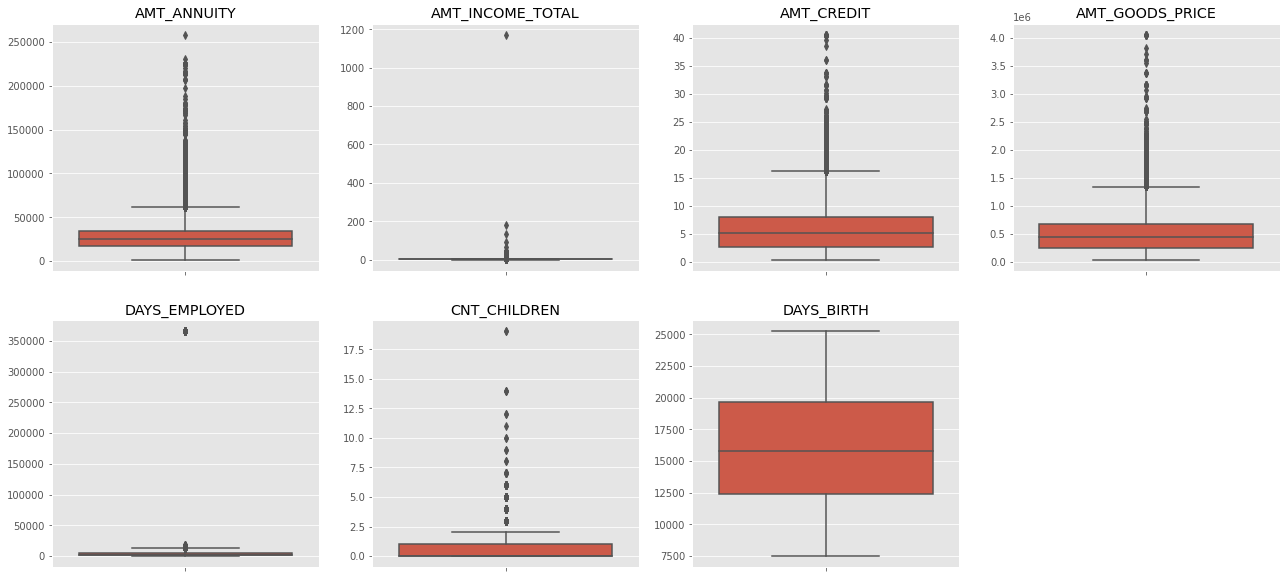

In [178]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=app_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=app_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>It can be seen that in current application data
<br>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
<br>AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
<br>DAYS_BIRTH has no outliers which means the data available is reliable.
<br>DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.</i>
</div>  

In [179]:
#We can see the stats for these columns below as well.
app_data[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307507.0000,307507.0000,307507.0000,307507.0000,307507.0000,307507.0000,307507.0000
mean,27108.5807,1.6880,5.9903,538317.8090,16037.0273,0.4170,67725.5699
std,14493.5221,2.3712,4.0249,369289.7661,4363.9824,0.7221,139444.4693
min,1615.5000,0.2565,0.4500,40500.0000,7489.0000,0.0000,0.0000
25%,16524.0000,1.1250,2.7000,238500.0000,12413.0000,0.0000,933.0000
50%,24903.0000,1.4715,5.1353,450000.0000,15750.0000,0.0000,2219.0000
75%,34596.0000,2.0250,8.0865,679500.0000,19682.0000,1.0000,5707.0000
max,258025.5000,1170.0000,40.5000,4050000.0000,25229.0000,19.0000,365243.0000


<h4><font color = purple >6.2 Identify outliers in the Previous Application Data </font></h4>

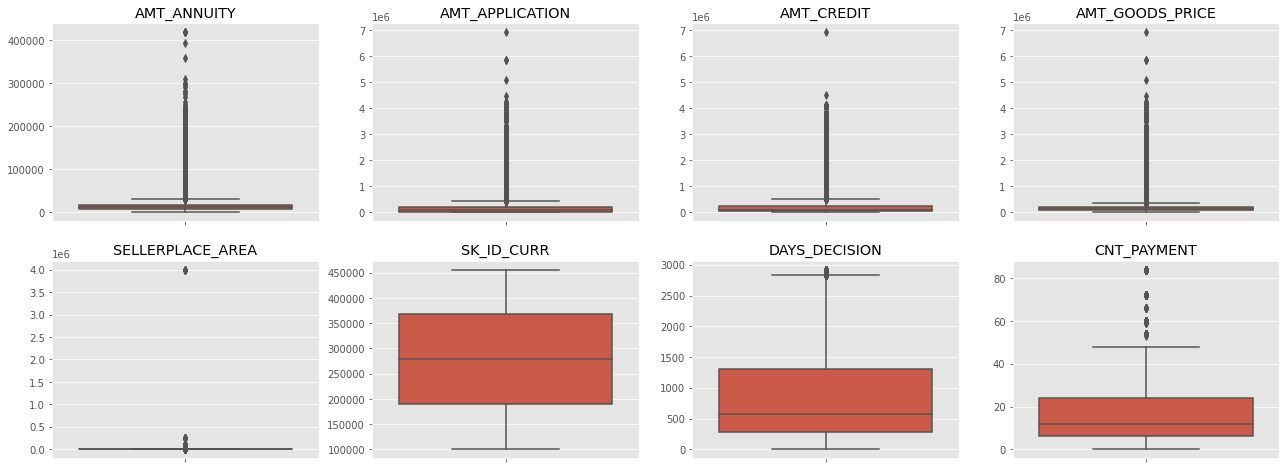

In [180]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=prev_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=prev_data[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>It can be seen that in previous application data
<br>AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.
<br>CNT_PAYMENT has few outlier values.
<br>SK_ID_CURR is an ID column and hence no outliers.
<br>DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.</i>
</div>  

In [181]:
#We can see the stats for these columns below as well.
prev_data[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1670214.0000,1670214.0000,1670213.0000,1670214.0000,1670214.0000,1297984.0000,1670214.0000
mean,14906.5062,175233.8604,196114.0212,201181.5352,313.9511,16.0541,880.6797
std,13177.5141,292779.7624,318574.6165,280862.8572,7127.4435,14.5673,779.0997
min,0.0000,0.0000,0.0000,0.0000,-1.0000,0.0000,1.0000
25%,7547.0963,18720.0000,24160.5000,67500.0000,-1.0000,6.0000,280.0000
50%,11250.0000,71046.0000,80541.0000,112320.0000,3.0000,12.0000,581.0000
75%,16824.0263,180360.0000,216418.5000,180405.0000,82.0000,24.0000,1300.0000
max,418058.1450,6905160.0000,6905160.0000,6905160.0000,4000000.0000,84.0000,2922.0000


## <a id="32">7. Derived Metrics : Binning Continuous Variables</a>

In [182]:
#Creating bins for AMT_INCOME_TOTAL
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

app_data['AMT_INCOME_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins,labels=slot)

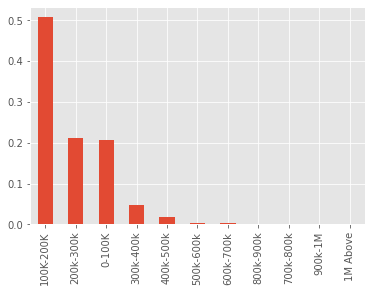

In [183]:
app_data['AMT_INCOME_RANGE'].value_counts(normalize= True).plot.bar();

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>More than 50% of the applicnats have an income range of 100K-200K and very meagre percentage of applicants have a high-scale income above 800k</i>
</div>  

In [184]:
#Creating bins for AMT_CREDIT
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slots)

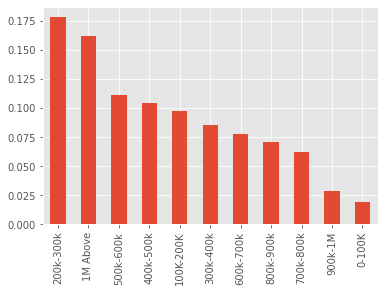

In [185]:
app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True).plot.bar();


<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>The credit amount of loan for the highest number of applications is in the range of 200K-300K, followed by a credit loan above 1M</i>
</div>  

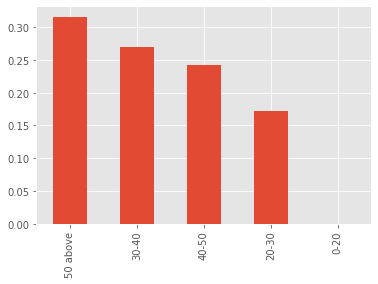

In [187]:
#Creating bins for Age Group
app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

app_data['AGE_GROUP']=pd.cut(app_data['DAYS_BIRTH'],bins=bins,labels=slots)
app_data['AGE_GROUP'].value_counts(normalize=True).plot.bar();

In [188]:
#checking the binning of data and % of data in each category
app_data['AGE_GROUP'].value_counts(normalize=True)*100

50 above   31.6045
30-40      27.0290
40-50      24.1949
20-30      17.1713
0-20        0.0003
Name: AGE_GROUP, dtype: float64

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>The highest number of loan applications has been made by clients from the age group of 30-40 years, followed by the age group of 40-50 years. The youngsters below 20 years and senior citizens, above 60 years old, comprise even less than 10% of the loan applicants</i>
</div>  



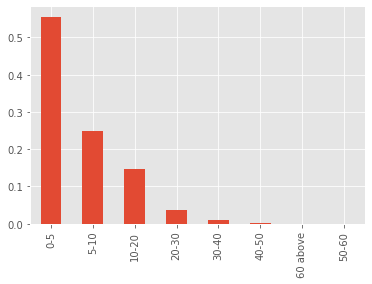

In [189]:
#Creating bins for EMPLOYMENT_YEAR
app_data['EMPLOYMENT_YEAR'] = app_data['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
app_data['EMPLOYMENT_YEAR']=pd.cut(app_data['EMPLOYMENT_YEAR'],bins=bins,labels=slots)
app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True).plot.bar();

In [190]:
#checking the binning of data and % of data in each category
app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5        55.5829
5-10       24.9660
10-20      14.5646
20-30       3.7497
30-40       1.0587
40-50       0.0780
60 above    0.0000
50-60       0.0000
Name: EMPLOYMENT_YEAR, dtype: float64

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience.</i>
</div>  

## <a id="32">8. Checking the Imbalance Percentage </a>


In [191]:
100*(app_data.TARGET.value_counts())/ (len(app_data))

0   91.9270
1    8.0730
Name: TARGET, dtype: float64

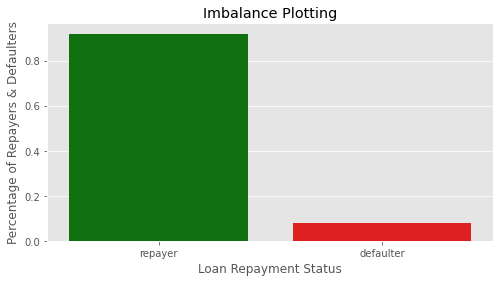

In [195]:
#visual representation of the Imbalance Percentage
Imbalance = app_data["TARGET"].value_counts(normalize=True).reset_index()

plt.figure(figsize=(8,4))
x= ['repayer','defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Percentage of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Among all the loans applied, only around 8% of the applicants face payment difficulties and potentially become defaulters. The remaining approx 92% applicants are able to repay the loan in time, without any difficulty</i>
</div>  

<h4><font color = purple >8.1 Creating different datasets for Defaulters and Repayers </font></h4>

In [196]:
# Dividing the dataset into two dataset of target=1(defaulter) and target=0(repayer)
defaulter = app_data.loc[app_data['TARGET']==1]
repayer = app_data.loc[app_data['TARGET']==0]

In [197]:
repayer.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_GROUP,EMPLOYMENT_YEAR
1,100003,0,Cash loans,F,N,N,0,2.7000,12.9350,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,1188,1186.0000,291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200k-300k,1M Above,40-50,0-5
2,100004,0,Revolving loans,M,Y,Y,0,0.6750,1.3500,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,52,225,4260.0000,2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0000,0.0000,0.0000,0.0000,-815.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0-100K,100K-200K,50 above,NaN
3,100006,0,Cash loans,F,N,Y,0,1.3500,3.1268,29686.5000,297000.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,52,3039,9833.0000,2437,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0000,0.0000,2.0000,0.0000,-617.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,100K-200K,300k-400k,50 above,5-10
4,100007,0,Cash loans,M,N,Y,0,1.2150,5.1300,21865.5000,513000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,54,3038,4311.0000,3458,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0000,0.0000,0.0000,0.0000,-1106.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,100K-200K,500k-600k,50 above,5-10
5,100008,0,Cash loans,M,N,Y,0,0.9900,4.9050,27517.5000,454500.0000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.0358,46,1588,4970.0000,477,2,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0000,0.0000,0.0000,0.0000,-2536.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0-100K,400k-500k,40-50,0-5


In [199]:
defaulter.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_GROUP,EMPLOYMENT_YEAR
0,100002,1,Cash loans,M,N,Y,0,2.0250,4.0660,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,25,637,3648.0000,2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0000,2.0000,2.0000,2.0000,-1134.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,200k-300k,400k-500k,20-30,0-5
26,100031,1,Cash loans,F,N,Y,0,1.1250,9.7999,27076.5000,702000.0000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.0180,51,2628,6573.0000,1827,1,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,10.0000,1.0000,10.0000,0.0000,-161.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,100K-200K,900k-1M,50 above,5-10
40,100047,1,Cash loans,M,N,Y,0,2.0250,11.9358,35028.0000,855000.0000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.0252,47,1262,1182.0000,1029,2,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.0000,0.0000,0.0000,0.0000,-1075.0000,0.0000,0.0000,0.0000,2.0000,0.0000,4.0000,200k-300k,1M Above,40-50,0-5
42,100049,1,Cash loans,F,N,N,0,1.3500,2.8887,16258.5000,238500.0000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0073,36,3597,45.0000,4409,2,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,1.0000,0.0000,1.0000,0.0000,-1480.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,100K-200K,200k-300k,30-40,5-10
81,100096,1,Cash loans,F,N,Y,0,0.8100,2.5200,14593.5000,252000.0000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.0287,67,365243,5391.0000,4199,2,2,2,THURSDAY,10,0,0,0,0,0,0,Unknown,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0-100K,200k-300k,50 above,NaN


## <a id="32">9. Univariate Analysis for Categorical Variables</a>

<h4><font color = purple >9.1 Defining a function to plot countplots for Univariate Categorical Analysis on app_data </font></h4>


In [200]:
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = app_data[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_data,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set3')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 10, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

<h4><font color = purple >9.2 Segmented Univariate Analysis </font></h4>


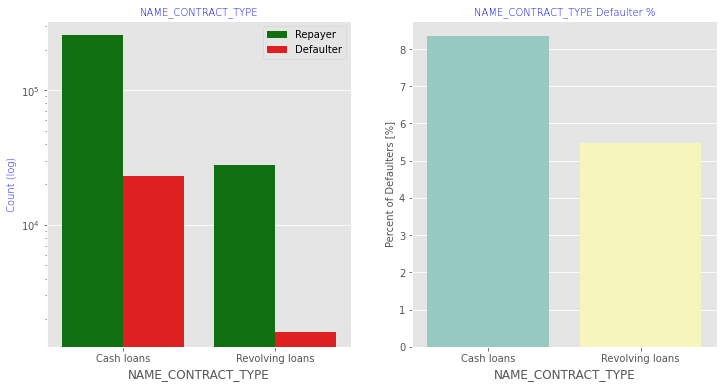

In [201]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Almost 90% of the loans applied, are of Cash loan type. <br> In a same time frame,a larger amount of Revolving loans, comparing with their frequency, are not repaid</i>
</div>  

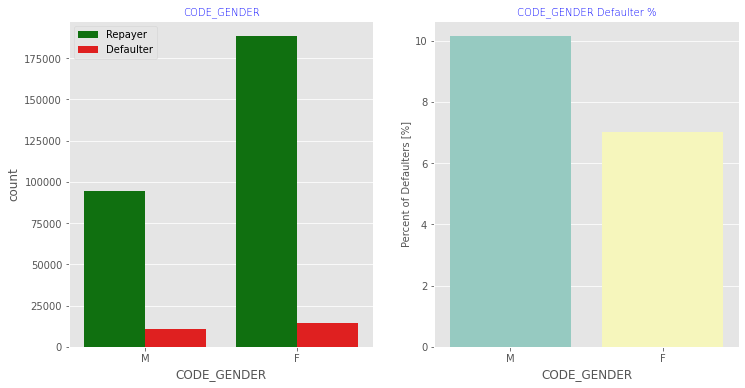

In [202]:
# Checking the Gender type based on loan repayment status
univariate_categorical('CODE_GENDER')

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>The number of female applicants is significantly higher (almost double) than male applicants<br> Based on the percentage of defaulted credits, males have a higher chance of not returning their loans, compared to women </i>
</div> 

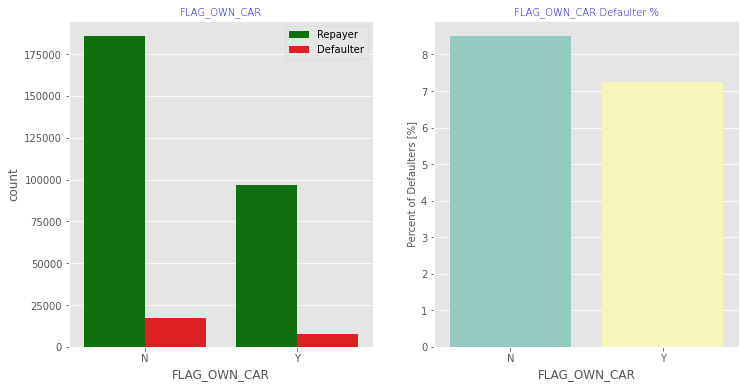

In [203]:
# Checking if owning a car has any impact on loan repayment status
univariate_categorical('FLAG_OWN_CAR')

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>The defaulter percentage is almost same for both category of customers who own or do not own a car. 
    <br>There doesnot seem to be a direct correlation of owning a car, on the loan payment status </i>
</div> 

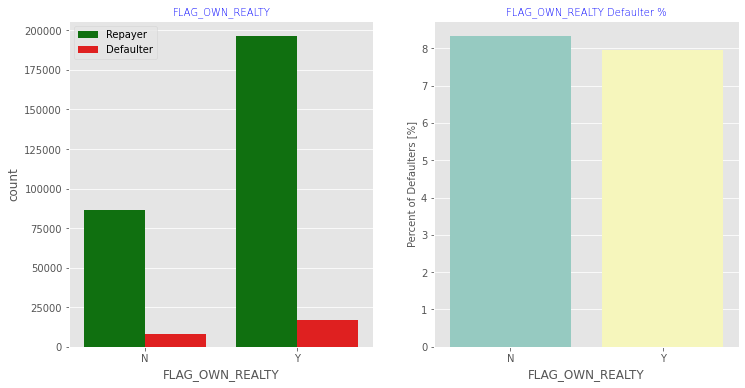

In [204]:
# Checking if owning a realty has any impact on loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>The defaulter percentage is almost same for both category of customers who own or do not own a realty. 
    <br>There doesnot seem to be a direct correlation of owning a car, on the loan payment status </i>
</div> 

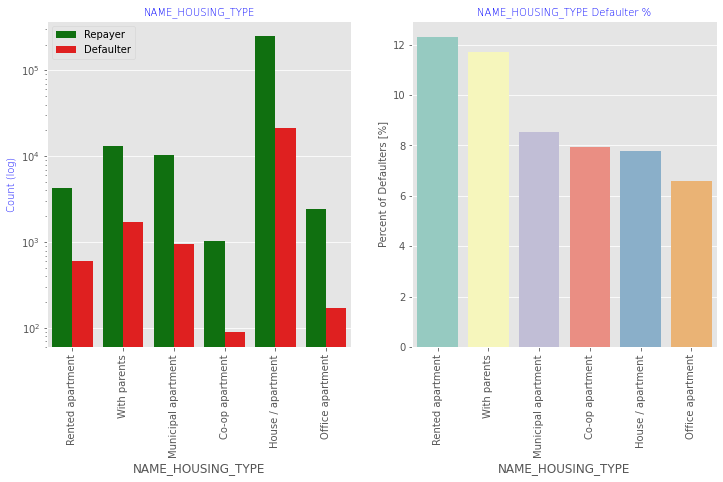

In [205]:
# Checking if the type of housing residence of the customer has any impact on loan repayment status
univariate_categorical('NAME_HOUSING_TYPE',True,True,True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Majority of the applicants livein House/Apartment
    <br>Applicants living in rented apartments or with parents, are most likely to face payment issue to repay the loan.
    <br>Applicants livingin office apartment, have the lowest default rate</i>
</div> 

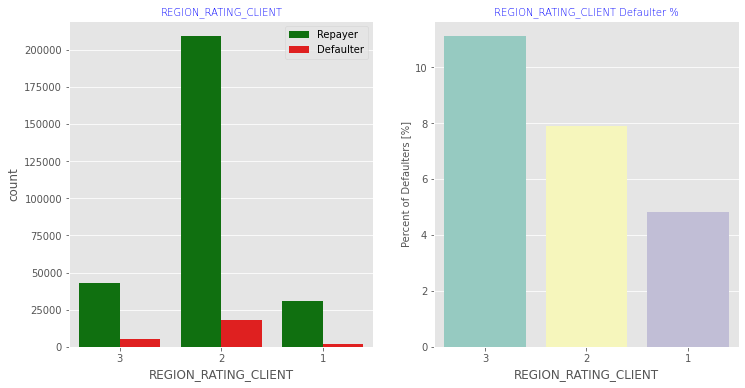

In [206]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Majority of the applicants live in Region_Rating 2 place
    <br>Region Rating 3 has the highest default rate (11%)
    <br>Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans</i>
</div> 

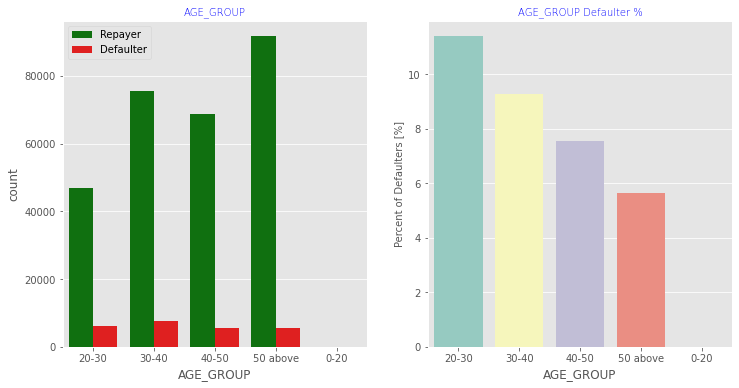

In [207]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Applicants in the age group 20-40 have highest tendency of defaulting and people above 50 years age, have lowest tendency of defaulting </i>
</div>  

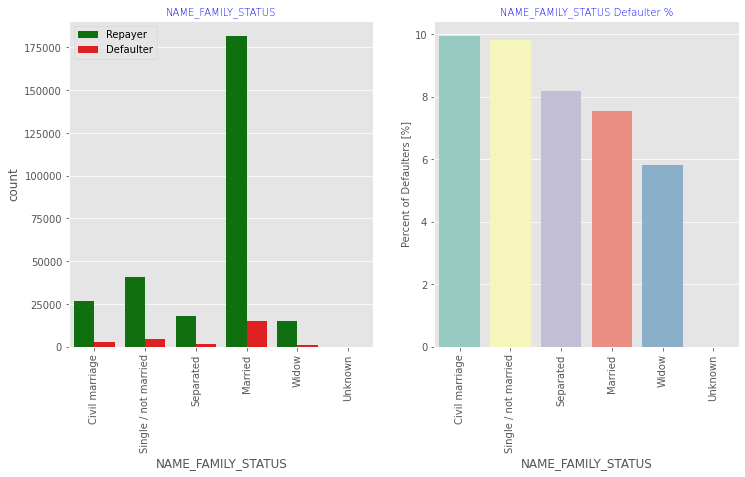

In [208]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>Majority of the applicants livein House/Apartment
    Most of the applicants, are married, followed by Single/not married and civil marriage <br> People in civil marriage, are most likely to be defaulter</i>
</div> 

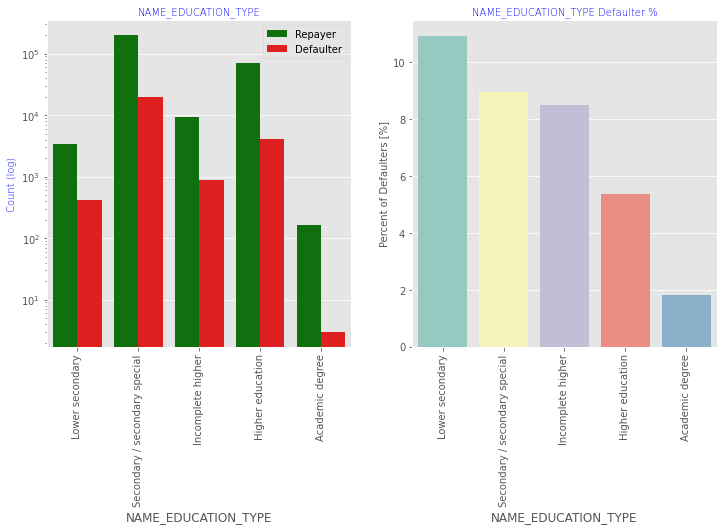

In [209]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i><li>Majority of the applicants have Secondary / secondary special education, followed by applicants with Higher education</li>
   <li>The Lower secondary category comprise of  the largest defaulting rate(11%). The people with Academic degree have less than 2% defaulting rate.</li></i>
</div> 

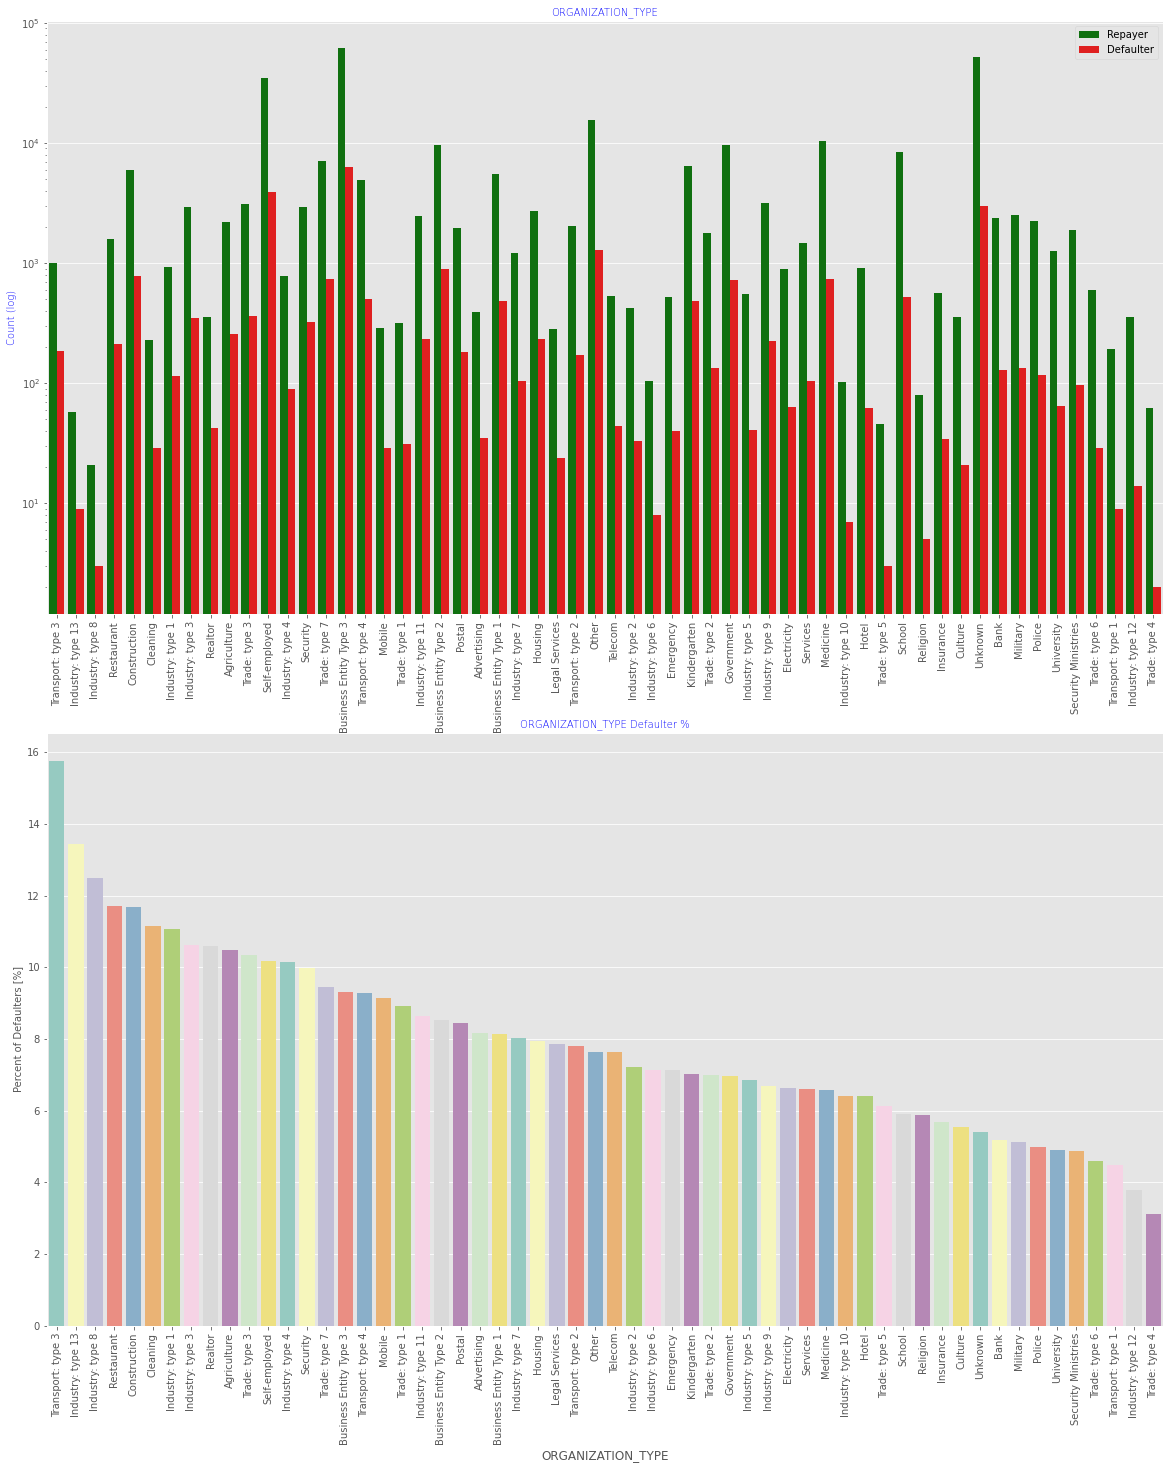

In [210]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
    <i><li>Most of the loan applicants are from Business Entity Type 3</li>
    <li>Organizations with highest defaulter rate are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). </li><li>Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.</li>
     <li>The organization catergory 'Trade Type 4 and 5' and 'Industry type 8' has least default rate, thus safest for loan provision. </li>    
           </i>
</div>  

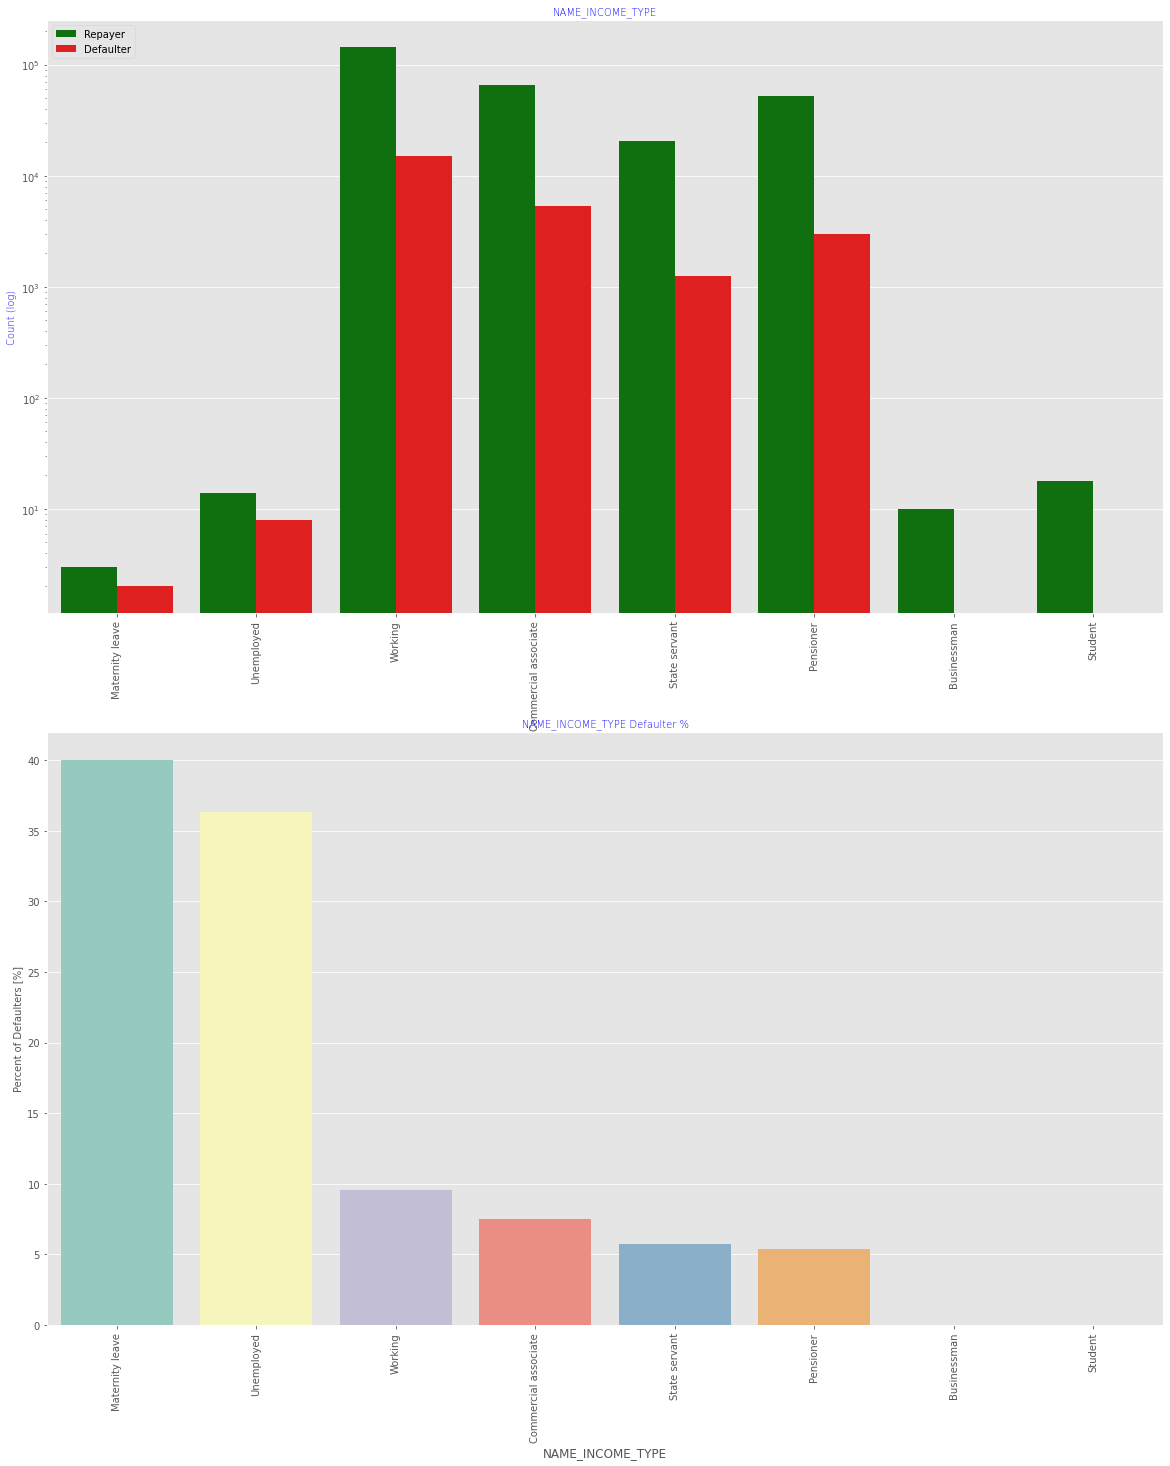

In [211]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i><li>Most of applicants have income type as Working, followed by Commercial associate, Pensioner and State servant.</li>
    <li>The applicants with Maternity leave as typeof income, have almost 40% defaulter rate, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% defaulter rate.</li>
    <li>Student and Businessmen, though less in numbers do not have any default record. Thus these two category are <b>safest</b> for providing loan.</li>
    </i>
</div> 

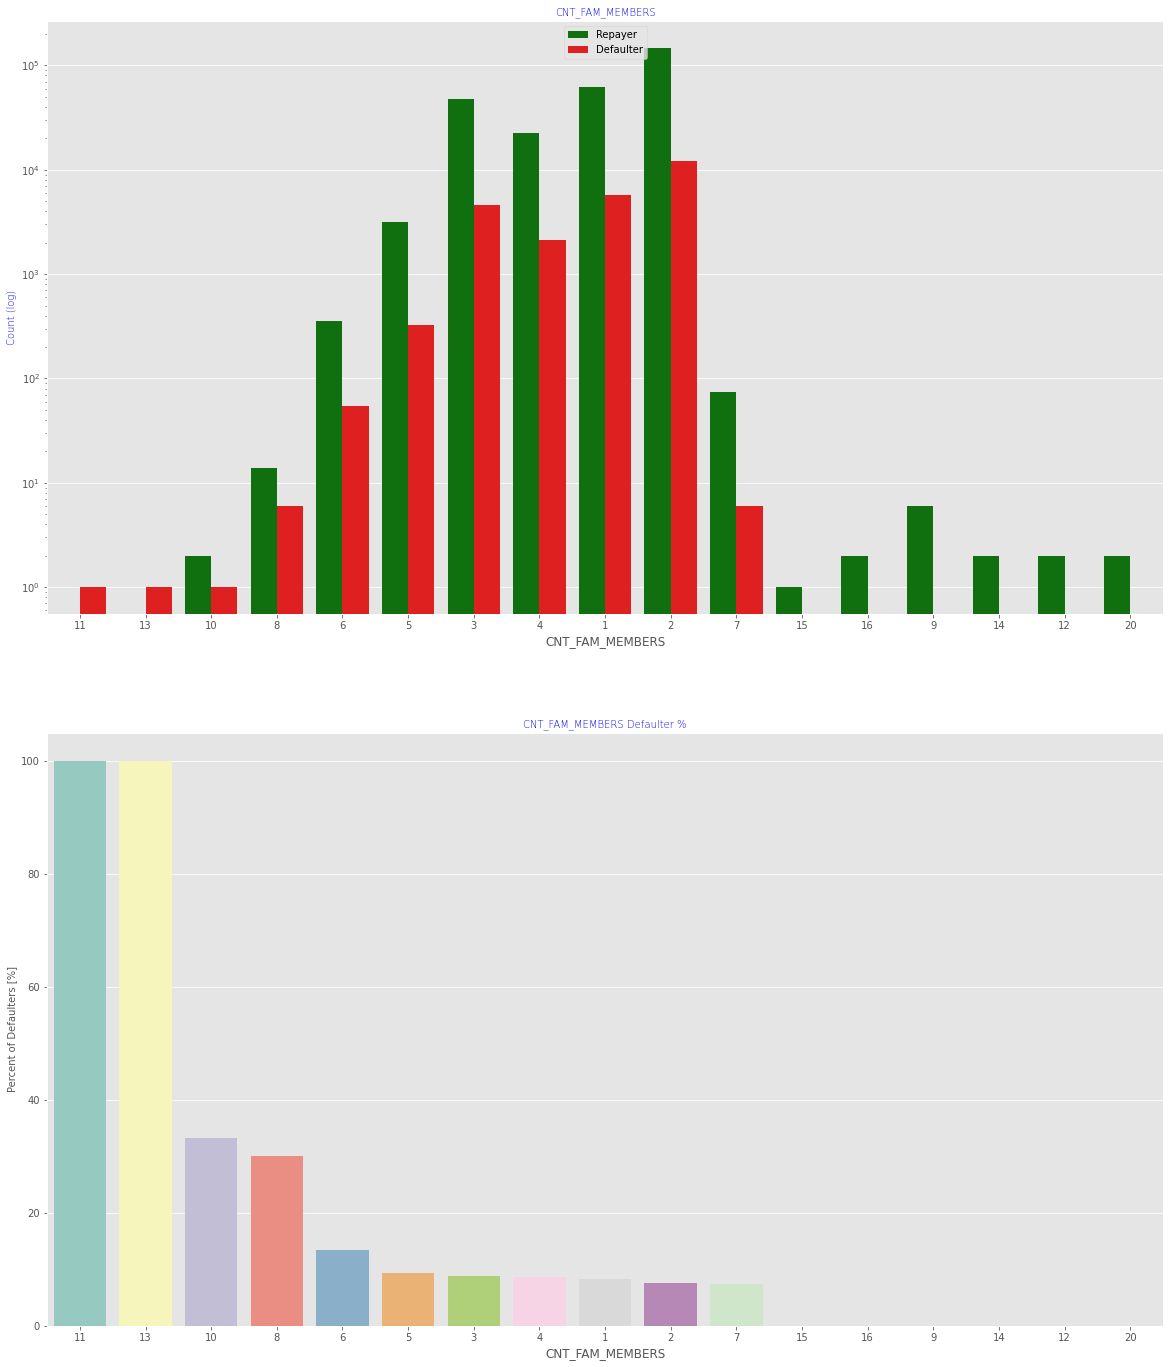

In [212]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>More the number of family members, imply more tendency of being a defaulter</i>
</div>  

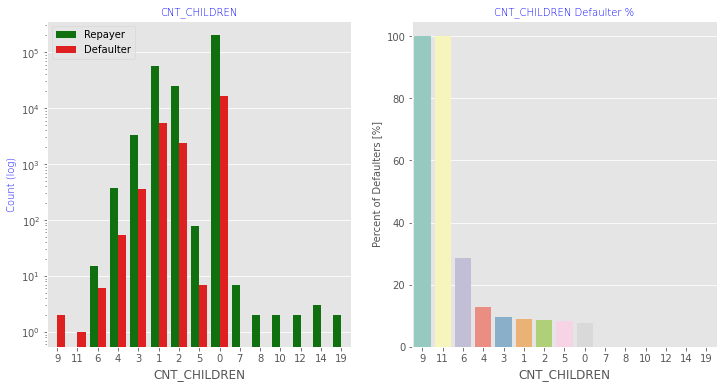

In [213]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
    <i><li>People with no children, are most likely to apply for loan.</li>
    <li>Applicants with more than 4 children have a very high default rate, while people with child count 9 and 11 show 100% default rate</li></i>
</div>  

## <a id="32">10. Bivariate / Multivariate Analysis for Categorical Variables</a>


In [214]:
app_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0000,6.5250,6.2723,1.8000,2.2500,4.9500,8.4375,22.5000
Commercial associate,71616.0000,2.0295,1.4798,0.2655,1.3500,1.8000,2.2500,180.0009
Maternity leave,5.0000,1.4040,1.2686,0.4950,0.6750,0.9000,1.3500,3.6000
Pensioner,55362.0000,1.3640,0.7665,0.2565,0.9000,1.1700,1.6650,22.5000
State servant,21703.0000,1.7974,1.0088,0.2700,1.1250,1.5750,2.2500,31.5000
Student,18.0000,1.7050,1.0664,0.8100,1.1250,1.5750,1.7888,5.6250
Unemployed,22.0000,1.1054,0.8806,0.2655,0.5400,0.7875,1.3500,3.3750
Working,158771.0000,1.6317,3.0758,0.2565,1.1250,1.3500,2.0250,1170.0000


<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>The average income is highest for Businessman, with an income ranging between 4 lakhs to around 10 laks, with 95% confidence level</i>
</div>  

## <a id="32">11. Analysis for Numeric Variables</a>

<h4><font color = purple >11.1 Correlation between numeric variable </font></h4>


In [215]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = repayer.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.9985
160,AMT_GOODS_PRICE,AMT_CREDIT,0.9870
314,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8786
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.8593
161,AMT_GOODS_PRICE,AMT_ANNUITY,0.7764
134,AMT_ANNUITY,AMT_CREDIT,0.7713
242,DAYS_EMPLOYED,DAYS_BIRTH,0.6260
133,AMT_ANNUITY,AMT_INCOME_TOTAL,0.4189
159,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.3494
107,AMT_CREDIT,AMT_INCOME_TOTAL,0.3428


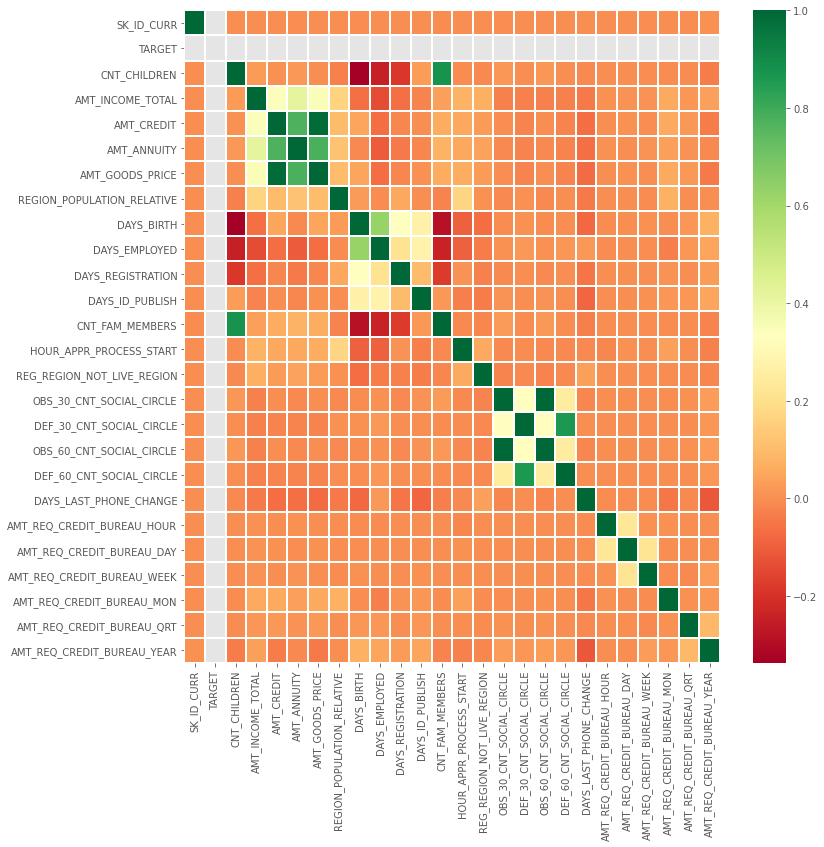

In [216]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(repayer.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>Correlating factors amongst repayers:
   <i><br>Credit amount is highly correlated with
    <li>loan annuity</li>
    <li>total income</li>
    <li>amount of goods price</li>
<li>Also, the age of repayers have a high correlation with number of days employed</li>


</i>
</div>  

In [217]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = defaulter.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
457,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.9983
160,AMT_GOODS_PRICE,AMT_CREDIT,0.9828
314,CNT_FAM_MEMBERS,CNT_CHILDREN,0.8855
484,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.8690
161,AMT_GOODS_PRICE,AMT_ANNUITY,0.7523
134,AMT_ANNUITY,AMT_CREDIT,0.7522
242,DAYS_EMPLOYED,DAYS_BIRTH,0.5824
458,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.3372
431,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.3338
268,DAYS_REGISTRATION,DAYS_BIRTH,0.2891


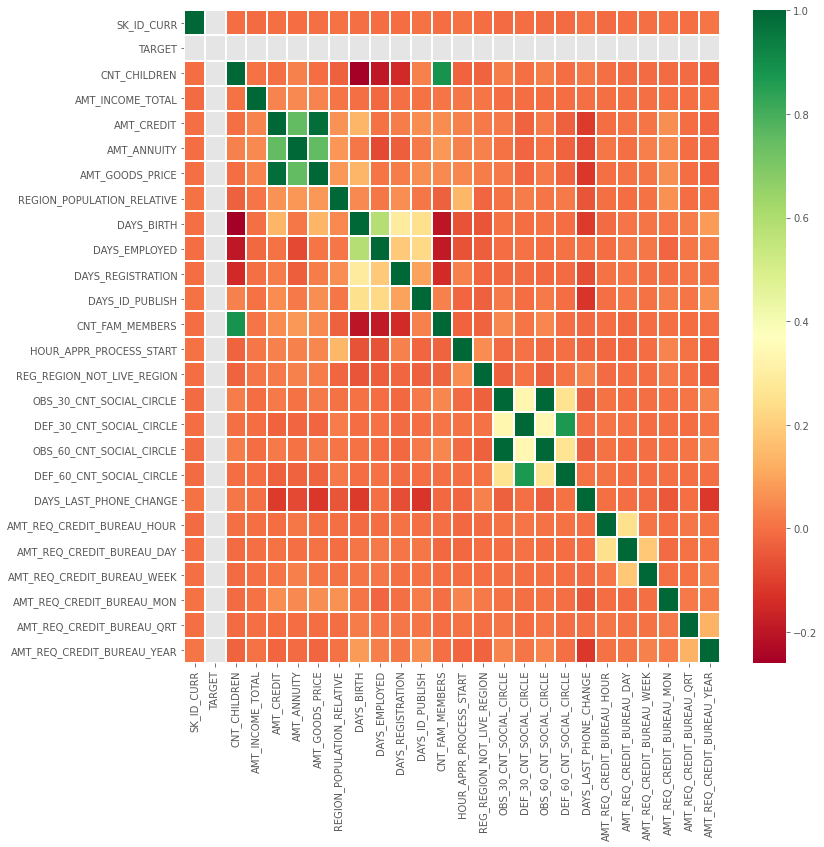

In [218]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(defaulter.corr(), cmap="RdYlGn",annot=False,linewidth =1)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>Correlating factors amongst defaulters:</li>
   <i><li>Credit amount is highly correlated with amount of goods price, as among repayers.</li>
       <li>But there is a major drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.</li>
     <li>Also, the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)</li>
    <li>There is also a drop in the correlation between Days_birth and number of children to 0.259 in defaulters when compared to 0.337 in repayers</li>
<li>Also, the age of repayers have a higher correlation with number of days employed(0.62) when compared to defaulters(0.58)</li>


</i>
</div>  

<h4><font color = purple >11.2 Univariate analysis of numeric variable </font></h4>


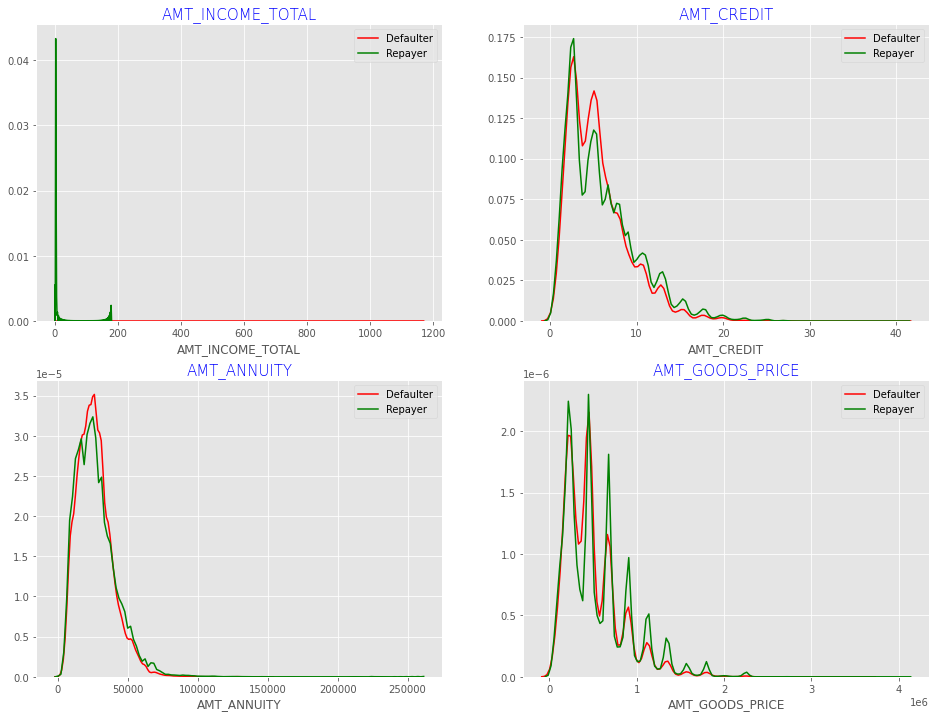

In [219]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(defaulter[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(repayer[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

<div class="alert alert-block alert-info">
    <b>Inference:</b>
    <i><li>Credit amount of the loan is mostly less than 10 lakhs</li>
    <li>The annuity amount paid for credit loan, is mostly below 50000</li>
    <li>Maximum number of loans are taken for goods price less than 10 lakhs</li>
<li>The repayer and defaulter distribution charts are almost overlapping in all the charts, which signifies that we cannot use any of these attributes separately to make a prediction</li></i>
</div> 

<h4><font color = purple >11.2 Bivariate analysis of numeric variable </font></h4>

In [220]:
#function for plotting bivariate relation plots for numeric varianles in app_data

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=app_data, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

<Figure size 1080x432 with 0 Axes>

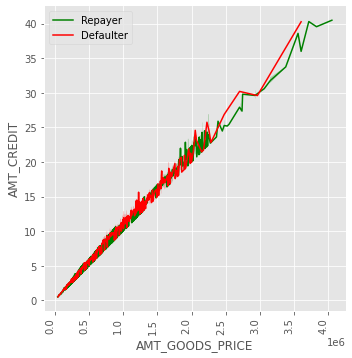

In [221]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',app_data,"TARGET", "line", ['g','r'], False,(15,6))

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <br>
   <i>When the credit amount goes beyond 3M, there is an increase in defaulters</i>
</div>  

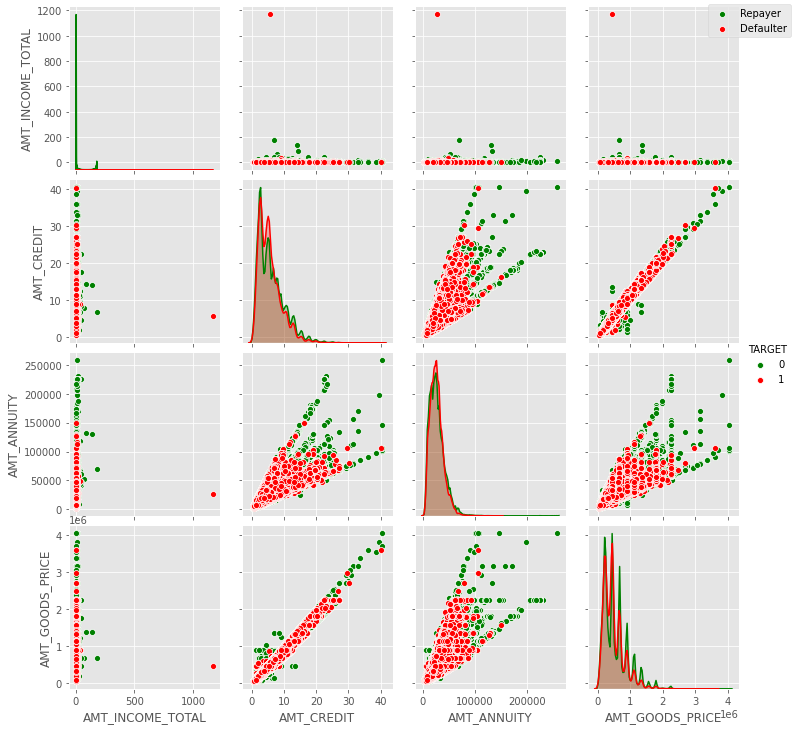

In [222]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = app_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <i>
   <li>AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line</li>
    <li>There are very less defaulters for AMT_CREDIT >3M or amt_goods_price> 3M or amt_annuity >15000 </li>
    </i>
</div>  

## <a id="32">12. Merge Current and Previous Application dataframes</a>


In [223]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
merge_data = pd.merge(app_data, prev_data, how='inner', on='SK_ID_CURR')
merge_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE_GROUP,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,2.0250,4.0660,24700.5000,351000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0188,25,637,3648.0000,2120,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0000,2.0000,2.0000,2.0000,-1134.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,200k-300k,400k-500k,20-30,0-5,1038818,Consumer loans,9251.7750,179055.0000,179055.0000,179055.0000,SATURDAY,9,Y,1,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0000,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,2.7000,12.9350,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,1188,1186.0000,291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200k-300k,1M Above,40-50,0-5,1810518,Cash loans,98356.9950,900000.0000,1035882.0000,900000.0000,FRIDAY,12,Y,1,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0000,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,2.7000,12.9350,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,1188,1186.0000,291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200k-300k,1M Above,40-50,0-5,2636178,Consumer loans,64567.6650,337500.0000,348637.5000,337500.0000,SUNDAY,17,Y,1,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0000,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,2.7000,12.9350,35698.5000,1129500.0000,Family,State servant,Higher education,Married,House / apartment,0.0035,45,1188,1186.0000,291,2,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0000,0.0000,1.0000,0.0000,-828.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,200k-300k,1M Above,40-50,0-5,2396755,Consumer loans,6737.3100,68809.5000,68053.5000,68809.5000,SATURDAY,15,Y,1,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0000,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,0.6750,1.3500,6750.0000,135000.0000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0100,52,225,4260.0000,2531,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0000,0.0000,0.0000,0.0000,-815.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0-100K,100K-200K,50 above,NaN,1564014,Consumer loans,5357.2500,24282.0000,20106.0000,24282.0000,FRIDAY,5,Y,1,XAP,Approved,815,Cash th

In [224]:
#Checking the details of the merged dataframe
merge_data.shape

(1413646, 73)

In [225]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413646 entries, 0 to 1413645
Data columns (total 73 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1413646 non-null  int64   
 1   TARGET                        1413646 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1413646 non-null  category
 3   CODE_GENDER                   1413646 non-null  category
 4   FLAG_OWN_CAR                  1413646 non-null  category
 5   FLAG_OWN_REALTY               1413646 non-null  category
 6   CNT_CHILDREN                  1413646 non-null  int64   
 7   AMT_INCOME_TOTAL              1413646 non-null  float64 
 8   AMT_CREDIT_x                  1413646 non-null  float64 
 9   AMT_ANNUITY_x                 1413646 non-null  float64 
 10  AMT_GOODS_PRICE_x             1413646 non-null  float64 
 11  NAME_TYPE_SUITE               1413646 non-null  category
 12  NAME_INCOME_TY

In [226]:
#Splitting the merged dataframe based on Repayer and Defaulter
merge_repayer = merge_data[merge_data['TARGET']==0] # Repayers
merge_defaulter = merge_data[merge_data['TARGET']==1] # Defaulters

In [227]:
#function for plotting countplots for univariate categorical analysis on the merge_data

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

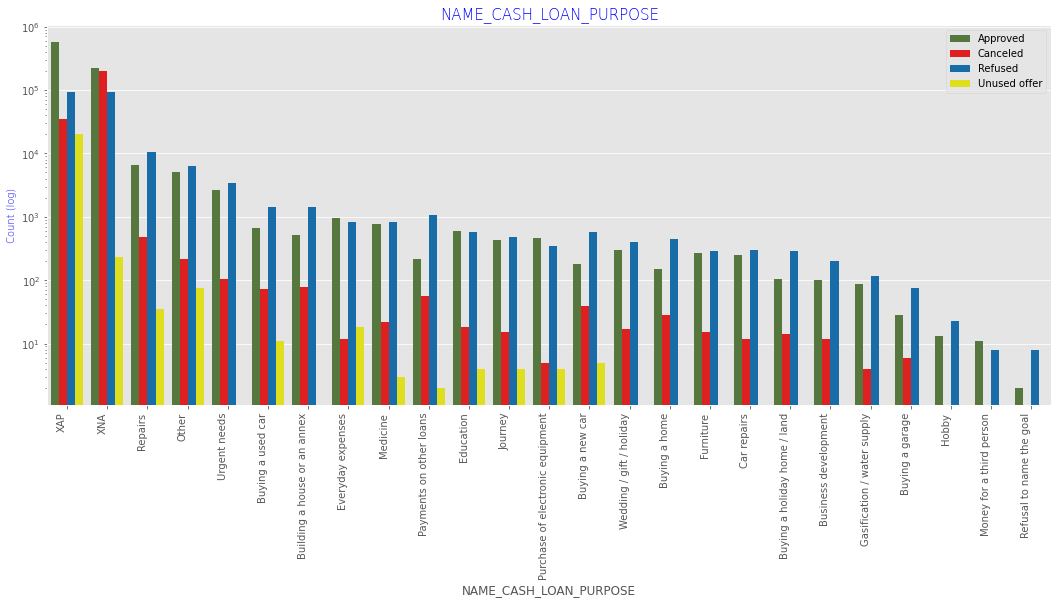

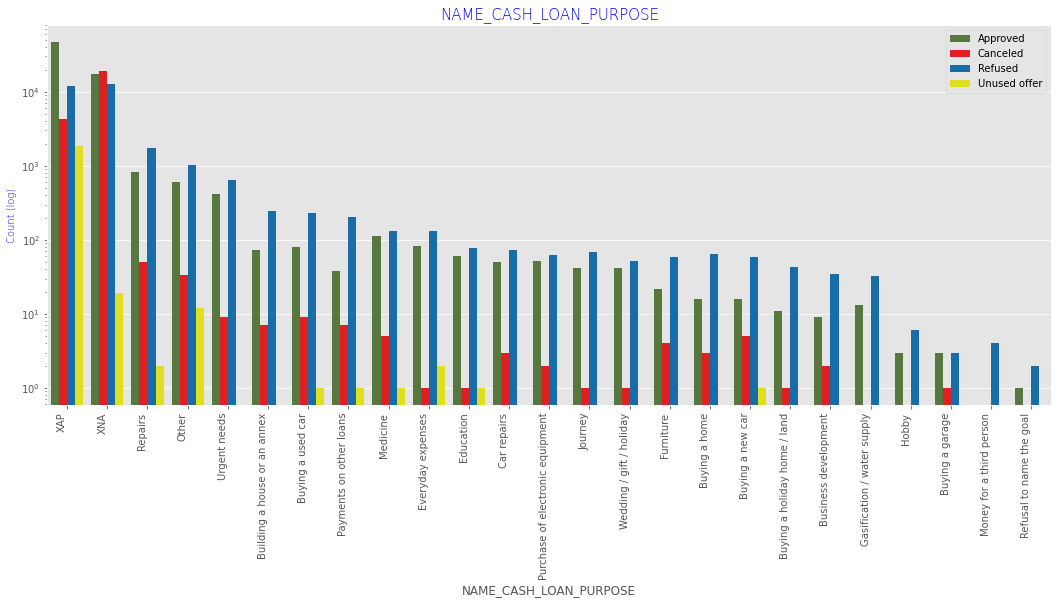

In [228]:
#Plotting Contract Status vs purpose of the loan
univariate_merged("NAME_CASH_LOAN_PURPOSE",merge_repayer,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",merge_defaulter,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

<div class="alert alert-block alert-info">
    <b>Inference:</b>
   <i><li> Loan purpose has high number of unknown values (XAP, XNA)</li>
            <li> Loan taken for the purpose of Repairs seems to have highest defaulter rate</li>
            <li> A huge number of applications have been rejected or refused ,where the purpose is repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which forces the client to refuse the loan.</li>
</i>
</div>  

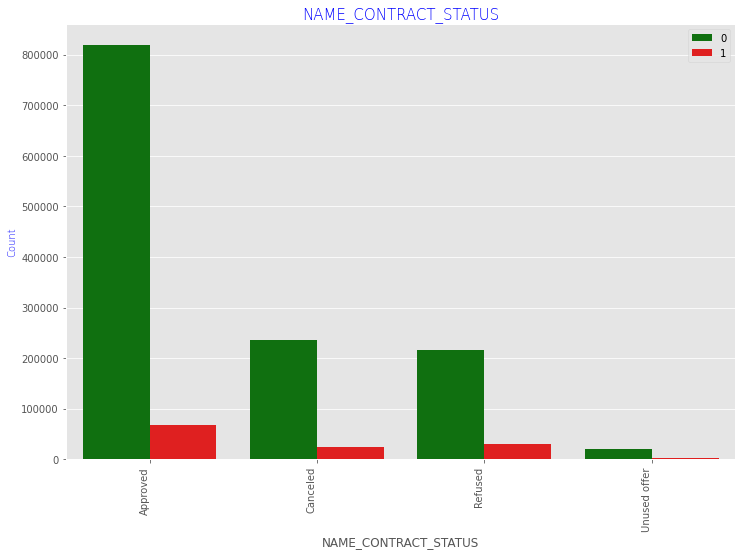

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818833     92.41%
                     1        67243      7.59%
Canceled             0       235634     90.83%
                     1        23800      9.17%
Refused              0       215927      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [229]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",merge_data,"TARGET",['g','r'],False,(12,8))
g = merge_data.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

<div class="alert alert-block alert-info">
    <b>Inference:</b>
    <i>
    <li> 90% of the previously cancelled customers, eventually turned out to be repayers. 
    Revisiting the interest rates increases the business opoortunity</li>
            <li> 88% of the clients who have previously refused a loan, eventually turned out to be repayers in current case.</li>
            <li> Refusal reason ca be logged for further analysis as these clients are turning into potential repayer customer. </li>
    </i>
</div>  

## <a id="32">13. Final Conclusions</a>


<h4><font color = purple >13.1 Driving Factors where a loan applicant can potentially be a Repayer </font></h4>

<div class="alert alert-block alert-info">
    <b>The below attributes of a customer imply a higher chance of him/her paying back:</b><i>
   <li> DAYS_BIRTH: People above age of 50</li>
   <li> NAME_INCOME_TYPE: Student and Businessmen</li>
   <li> NAME_EDUCATION_TYPE: Academic degree</li>
   <li> ORGANIZATION_TYPE: Trade Type 4 and 5 and Industry type 8 </li>
   <li> AMT_INCOME_TOTAL: Income more than 700,000 </li>
   <li> DAYS_EMPLOYED: Clients with 40+ year experience </li>
   <li> REGION_RATING_CLIENT: RATING 1</li>
   <li> CNT_CHILDREN: People with zero to two children</li>
   <li> NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage </li>
   </i></div>  

<h4><font color = purple >13.2 Driving Factors where a loan applicant can potentially be a Defaulter </font></h4>

<div class="alert alert-block alert-info">
    <b>The below attributes of a customer imply a higher chance of him/her facing payment issues:</b><i>
   <li> DAYS_BIRTH: People in age group of 20-40 </li>
   <li> NAME_INCOME_TYPE: Maternity leave OR Unemployed </li>
   <li> NAME_EDUCATION_TYPE: Lower Secondary & Secondary education</li>
   <li> ORGANIZATION_TYPE: Self-employed people and Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%) </li>
   <li> DAYS_EMPLOYED: Clients with less than 5 years of employment </li>
   <li> REGION_RATING_CLIENT: RATING 3</li>
   <li> CNT_CHILDREN & CNT_FAM_MEMBERS: People with more children or family members</li>
   <li> NAME_FAMILY_STATUS: civil marriage / single </li>
   <li> AMT_GOODS_PRICE: when credit amount goes beyond 3M </li>
   <li>NAME_CASH_LOAN_PURPOSE: Repairs </li>
   </i></div>  

<h4><font color = purple >13.3 Other observations </font></h4>
<div class="alert alert-block alert-info"><i>
   <li> 90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity. </li>
   <li> 88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.</li>
   </i></div>